<div class="alert alert-block alert-info">

# ASSIGNMENT 3 

#                               NAME : SARTHAK SAREEN

#                                  STUDENT ID : 30761182
</div>

<div class="alert alert-block alert-success">
    
# 1. LIBRARIES USED :

</div>   

In [1]:
import pandas as pd
import math
import numpy as np
import json
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import tabula
import pandas as pd
import xml.etree.ElementTree as ET
from math import sqrt
from re import match
import datetime
import numpy
import matplotlib 
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapely
from shapely.geometry import Point
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Sarthak\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 <div class="alert alert-block alert-success">
    
  # 2. INTRODUCTION :

The assignment contains two tasks in which task 1 includes the data integration part and the part two includes the data reshaping of the file.
In task 1 we have to read 7 datafiles with different format and make a file dataframe which will include all the columns according to the metadata given in which are calculated the min distance and the nearesh shopping center, train station id, supermarkets etc.
In task 2 we have apply different different normalization/transformation techiques to our final dataframe which contains the standardization, minmax normalization, log, power, box-cox transformation) on the teh columns which are price, Distance_to_sc, travel_min_to_CBD, and Distance_to_hospital. 

 <div class="alert alert-block alert-success">
    
   ## 2.1 TASK 1 - 
   </div>

 <div class="alert alert-block alert-success">
    
  ### 2.1.1 READING THE FILES INTO DATAFRAMES

In [2]:
#Reading the file
df_real_state_json = pd.read_json('real_state.json')
df_real_state_json[df_real_state_json.duplicated()]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
178,75492,-37.887530,145.052292,81 Mimosa Road,19380000,house,2015,3,2,2
835,40113,-37.696526,145.044800,23 Glenn Crescent,3132000,house,2009,3,1,1
913,70947,-37.852194,145.239719,1 Chartwell Drive,7452000,house,2015,3,1,2
937,55517,-37.846604,145.072575,31 Halley Avenue,27840000,house,2016,4,3,3
961,23368,-37.651905,144.905502,11 Millport Rise,4200000,house,2008,5,3,3
1009,82581,-37.902664,145.274865,15 Jubilee Drive,5144000,house,2012,4,2,2


In the above cell the real_state.json file is being reading using the pandas and a dataframe is being created of the file real_state.json.

To find the duplicate values in the dataframe, duplicated() will be used to give the duplicated rows in the dataframe.

In [3]:
df_real_state_json.drop_duplicates(inplace=True)

In the above cell the dupicated rows of the dataframe is being deleted from the dataframe using the function drop_dupicates in the dataframe only.

In [4]:
#Reading the file
list_sh_market = tabula.read_pdf("supermarkets.pdf", pages='all')
df_supermarket = pd.concat(list_sh_market)
df_supermarket.drop('Unnamed: 0',axis=1,inplace=True)
df_supermarket = df_supermarket.reset_index(drop=True)
df_supermarket[df_supermarket.duplicated()]

,id,lat,lng,type


In the above cell the pdf file is being read into the dataframe using the library tabula andthe function using the read_pdf() from the tabula library and giving the argument how="all" to read all the pages of the pdf file.
After reading the file we get list of dataframes. To make one datframe from the list of dataframes we use pd.concate() which will give dataframe with all the dataframes which where there in the list of dataframes.
Droping the not required columns from the dataframe.
Checking the dupicate values in the dataframe. As seen in the above cell there are no duplicated rows in the dataframe.

In [5]:
#Reading the file
df_hospital = pd.read_excel('hospitals.xlsx')
df_hospital.drop('Unnamed: 0',axis=1,inplace=True)
df_hospital[df_hospital.duplicated()]

,id,lat,lng,name


In the above cell the xlsx file is being read into the dataframeusing the pandas librarby and teh function is being is used is read_excel(). Droping the not required coloumns from the dataframe. Checking the duplicated rows in the dataframe using duplicated(). As seen in the above cell there are no duplicated rows in the dataframe of the hosiptals file.

In [6]:
#Reading the file
table = BeautifulSoup(open('shopingcenters.html','r').read()).find('table')
list_sh_centers = pd.read_html(str(table))
df_shopping_center = pd.concat(list_sh_centers)
df_shopping_center.drop('Unnamed: 0',axis=1,inplace=True)
df_shopping_center[df_shopping_center.duplicated()]

,sc_id,lat,lng


In the above cell the html file i.e shopping center file is being read using the function beautiful soup and using the .find() it finds the tables in the html file. using the pd.concat function the final dataframe is being made that contains the shopping centers details.
droping the not required columns from the dataframe. For checking the duplicated rows into the duplicated function is being used. As we can see that there are no dupicted rows in the dataframe which contains the shopping centers data.

In [7]:
#Reading the file
with open('real_state.xml')  as f:
    string_xml = f.read()
string_xml = string_xml[2:-1]
tree = ET.ElementTree(ET.fromstring(string_xml))
root = tree.getroot()
val=[]
df_real_state_xml = pd.DataFrame()
for x in range(len(root)):
    val =[]
    for i in range(len(root[x])):
        val.append(root[x][i].text)
    df_real_state_xml[root[x].tag] = pd.Series(val)
df_real_state_xml[df_real_state_xml.duplicated()]

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space


In the above cell the xml file which is real_state.sml is being read. First the file is being read using the.read(). After that the string is siced as there where some extra strings which was hindering the string to be parsed in the element tree function to read the xml file. AFter removing the extra string then the string is paresed to the ET.Element Tree function to make a tree for the xml file. The duplicate rows is being checked using the duplicated function. As seen in the above cell we can see that  there are no duplicate rows in the dataframe of the real_state xml.

In [8]:
df_real_state_xml.dtypes

property_id      object
lat              object
lng              object
addr_street      object
price            object
property_type    object
year             object
bedrooms         object
bathrooms        object
parking_space    object
dtype: object

In [9]:
df_real_state_json.dtypes

property_id        int64
lat              float64
lng              float64
addr_street       object
price              int64
property_type     object
year               int64
bedrooms           int64
bathrooms          int64
parking_space      int64
dtype: object

In [10]:
#changing the columns dtypes
int64_col = ['property_id', 'price', 'year','bedrooms','bathrooms','parking_space']
float64_col = ['lat','lng']
for i in int64_col:
    df_real_state_xml[i] = df_real_state_xml[i].astype('int64')
    
for i in float64_col:
    df_real_state_xml[i]=df_real_state_xml[i].astype('float64')
df_real_state_xml.dtypes

property_id        int64
lat              float64
lng              float64
addr_street       object
price              int64
property_type     object
year               int64
bedrooms           int64
bathrooms          int64
parking_space      int64
dtype: object

In the above cell converting the columns datatypes of the dataframe of real_state_xml. Making same as we have in the dataframe of real_state_json.
We can see that the datatype are now same.

In [11]:
#merging the dataframe and taking out the common values
s1 = pd.merge(df_real_state_json, df_real_state_xml, how='inner', on=['property_id'])['property_id']
df_real_state_xml = df_real_state_xml[~df_real_state_xml['property_id'].isin(s1.values)]

Merging the two dataframe which contains the real state data which are df_real_state_json and df_real_state_xml which inner join which gives the comman property_id which is same in both dataframes. We have make sure that there are not comman property_id in the final dataframe which contains the real state data.
making the xml dataframe without the comman property_id which is in the real_state_json dataframe.

In [12]:
#concating the dataframes
df_real_state_final =pd.concat([df_real_state_json,df_real_state_xml])
df_real_state_final = df_real_state_final.reset_index(drop=True)

Concating the both dataframes to make the final dataframe to make the final dataframe which contains the data of real state.

In [13]:
#Reading the file
df_stops = pd.read_csv("stops.txt", sep = ",")

Reading the stops.txt in the dataframe using the pandas librarby using the read_csv, sep as ","

 <div class="alert alert-block alert-success">
    
  ### 2.1.2 MAKING NEW COLUMNS WITH DISTNACE AND THE ID

In [14]:
#function for calculating the distance between the two lat and ong values
def short_dist(lon1,lat1,df):
    #radius of the earth
    R = 6378
    dist = []
    #matching the column of id
    id_col = list(filter(lambda v: match('.*id', v), df.columns))
    #matching the column of latitude
    lat = list(filter(lambda v: match('.*lat', v), df.columns))
    #matching the column of longitude
    long = list(filter(lambda v: match('.*lng', v), df.columns))
    #matching the column of longitude with different abbriviation
    long2 = list(filter(lambda v: match('.*lon', v), df.columns))
    #condition which longitude column is matched
    if len(long) > 0:
        for lat2,lon2 in zip(df[lat[0]],df[long[0]]):
            d_lat = np.radians(lat2-lat1)
            d_lon = np.radians(lon2-lon1)
            r_lat1 = np.radians(lat1)
            r_lat2 = np.radians(lat2)
            a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2
            val = 2 * R * np.arcsin(np.sqrt(a))
            #appending the distance calculated between two lats and two longs
            dist.append(val)
    #conditions which longitude column is matched
    if len(long2) > 0:
        for lat2,lon2 in zip(df[lat[0]],df[long2[0]]):
            d_lat = np.radians(lat2-lat1)
            d_lon = np.radians(lon2-lon1)
            r_lat1 = np.radians(lat1)
            r_lat2 = np.radians(lat2)
            a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2
            val = 2 * R * np.arcsin(np.sqrt(a))
            #appending the distance calculated between two lats and two longs
            dist.append(val)
    #finding the index of the minimum value of the distance
    ind = np.argmin(dist)
    #finding the minimum distance from the list
    min_dist = min(dist)
    #saving the id which has the mimumn distance
    sh = df[id_col[0]][ind]
    #returning the id and the minimum distance
    return sh,round(min_dist,3)
#refrence from www.stackoverflow.com

In the above function the minimum distance is being calculated and the id is also being returned with the long,lat and the dataframe as arguments of the function.

In [15]:
#making new columns with default values 
df_real_state_final['Shopping_center_id'] = 'not available'
df_real_state_final['Distance_to_sc'] = 0

#calling the function to give the nearest shopping center id and the minimum distance
df_real_state_final['Shopping_center_id'],df_real_state_final['Distance_to_sc'] = zip(*df_real_state_final.apply(lambda x : 
                                                                                                            short_dist(x['lng']
                                                                                      ,x['lat'],df_shopping_center),axis=1))

In the above cell two new columns is made named Shopping_center_id with default as 'not available' and Distance_to_sc with 0 as default value.
Calling the function short_dist to the final dataframe which have the data from real state. Filling the Shopping id as the id nearest shopping center and the smallest distance from the property id and the nearest shopping center.

In [16]:
#making new columns with default values 
df_real_state_final['Hospital_id'] = 'not available'
df_real_state_final['Distance_to_hospital'] = 0

#calling the function to give the nearest hospital_id and the minimum distance
df_real_state_final['Hospital_id'],df_real_state_final['Distance_to_hospital'] = zip(*df_real_state_final.apply(lambda x : 
                                                                                            short_dist(x['lng'],x['lat'],
                                                                                                       df_hospital),axis=1))

In the above cell two new columns is made named Hospital_id with default as 'not available' and Distance_to_hospital with 0 as default value.
Calling the function short_dist to the final dataframe which have the data from real state. Filling the Hospital_id as the id nearest hospital and the smallest distance from the property id and the nearest hospital.

In [17]:
#making new columns with default values 
df_real_state_final['Supermarket_id'] = 'not available'
df_real_state_final['Distance_to_supermarket'] = 0

#calling the function to give the nearest Supermarket_id and the minimum distance
df_real_state_final['Supermarket_id'],df_real_state_final['Distance_to_supermarket'] = zip(*df_real_state_final.apply(lambda x :
                                                                                        short_dist(x['lng'],
                                                                                        x['lat'],df_supermarket),axis=1))

In the above cell two new columns is made named Supermarket_id with default as 'not available' and Distance_to_supermaket with 0 as default value.
Calling the function short_dist to the final dataframe which have the data from real state. Filling the Supermarket_id as the id nearest shopping center and the smallest distance from the property id and the nearest shopping center.

In [18]:
#making new columns with default values 
df_real_state_final['Train_station_id'] = 0
df_real_state_final['Distance_to_train_station'] = 0

#calling the function to give the nearest Train_station_id and the minimum distance
df_real_state_final['Train_station_id'],df_real_state_final['Distance_to_train_station'] = zip(*df_real_state_final.apply(
                                                                            lambda x : 
                                                                            short_dist(x['lng']
                                                                          ,x['lat'],df_stops),axis=1))

In the above cell two new columns is made named Train_station_id with default as 'not available' and Distance_to_train_station with 0 as default value.
Calling the function short_dist to the final dataframe which have the data from real state. Filling the Train_station_id as the id nearest tgrain station and the smallest distance from the property id and the nearest train station.

In [19]:
#reading the files
df_stop_time = pd.read_csv("stop_times.txt", sep = ",")
df_trip = pd.read_csv("trips.txt", sep = ",")
df_shape = pd.read_csv("shapes.txt", sep = ",")
df_route = pd.read_csv("routes.txt", sep = ",")
df_dates = pd.read_csv("calendar_dates.txt", sep = ",")
df_agency = pd.read_csv("agency.txt", sep = ",")

Reading the txt files to find the travel_min_to_CBD distance and the flag value. using the pandas library and read_csv() sep as "," into dataframes.

In [20]:
#making new columns with default values
df_real_state_final['travel_min_to_CBD'] = 0
df_real_state_final['Transfer_flag'] = -1


Adding the column travel_min_to_CBD and Transfer_flag with default as 0.

In [21]:
#reading the datafile
df_weekdays = pd.read_csv("calendar.txt", sep = ",")
#filtering dataframe
df_weekdays = df_weekdays[(df_weekdays.monday==1) & (df_weekdays.tuesday==1) & (df_weekdays.wednesday) 
            & (df_weekdays.thursday==1) & (df_weekdays.friday==1) & (df_weekdays.saturday==0) & (df_weekdays.sunday==0)]
#service id with the specific conditions
day = df_weekdays['service_id']

In the above cellreading the file calender txt file using pandas and read_csv() sep as ","
According to the given condition find the service id which is running all the weekdays which are Monday,Tuesday,Wednesday,Thursday,Friday. Saving the service id into a variable.

In [22]:
#merging the dataframes
com = pd.merge(df_trip,df_stop_time,on='trip_id')
#filtering the dataframe and making list
new_trips = com['trip_id'][com.departure_time.str[0:2].isin(['07','08','09'])].to_list()
#filtering the dataframe
com = com[com['trip_id'].isin(new_trips)]

#com = com[(com.departure_time.str[0:2].isin(['07','08','09'])) | ((com.departure_time.str[0:2].isin(['09'])) & (com.stop_id == 1)) & (com['service_id'].isin(day)) 
#           & (com['trip_headsign']=='City (Flinders Street)')]
# com.reset_index(inplace=True)

com = com[(com['service_id'].isin(day)) & (com['trip_headsign']=='City (Flinders Street)')]
com.reset_index(inplace=True)

In the above cell making a dataframe with the merge of df_trip and df_stop created above.
In the next step making a list named new_trips which is being filters whith the time which is in 7am - 9am.
then filter the com dataframe which the merged dataframe of df_trip and the df_stop_time with the trips which where in between 7am - 9am.
In the next step filtering the dataframe with the required service id which is running all the weekdays and the trip headsign is 'City (Flinders Street)') and resrting the indexof the dataframe.

In [23]:
#making a df with groupby trip id and the list of stop ids
x = com.groupby('trip_id').agg({'stop_id':'unique'}).reset_index()

Making a new groupby dataframe which contains the trip id which and the column stop_id whoch contains the list of stop ids o fthat specific trips.

In [24]:
#initializing the varaibles with start and end time
start_time_check = '07:00:00'
end_time_check = '09:00:00'
start_time_check_dt = datetime.datetime.strptime(start_time_check, '%H:%M:%S')
end_time_check_dt = datetime.datetime.strptime(end_time_check, '%H:%M:%S')

In the above cell making a variable with start_time_check and the end_time_check with 7 am time and 9 am time.
Converting the varaibles into datetime format that will used in the function below.

In [25]:
flinder_id = df_stops['stop_id'][df_stops['stop_name'] == 'Flinders Street Railway Station'].to_list()
flinder_id = flinder_id[0]
flinder_id

19854

In [26]:
#function to calculate the minimum time to cbd and the transfer flag

def final_function(st_id):
    if st_id!=flinder_id:
        trip_valid = []
        store_valid_new = []
        trip_valid_df = pd.DataFrame()
        final_t = 0
        #making the list with valid trips
        for stop_id,trip_id in zip(x['stop_id'],x['trip_id']):
            s_l = [flinder_id,st_id]
            if set(s_l).issubset(stop_id) == True:
                trip_valid.append(trip_id)
        #filtering the dataframe with valid trips
        com2 = com[(com['trip_id'].isin(trip_valid)) & (com['stop_id'].isin(s_l))]
        com2.reset_index(inplace=True,drop=True)
        #making the list with final valid trips
        for index in com2.index:
            if (com2.loc[index,'stop_id'] == st_id) & (datetime.datetime.strptime(com2.loc[index,'departure_time'], '%H:%M:%S') <= end_time_check_dt) & (datetime.datetime.strptime(com2.loc[index,'departure_time'], '%H:%M:%S') >= start_time_check_dt):
                store_valid_new.append(com2.loc[index,'trip_id'])
                
        com2 = com2[(com2['trip_id'].isin(store_valid_new))]
        
        #calulating the mimimum distance
        if len(com2) !=0:
            time = com2.groupby('trip_id').agg({'arrival_time':'unique','departure_time':'unique'}).reset_index()
            time_final_lst = []
            for arr,dep in zip(time['arrival_time'],time['departure_time']):
                time1 = arr[1]
                time2 = dep[0]
                time1 = datetime.datetime.strptime(time1, '%H:%M:%S')
                time2 = datetime.datetime.strptime(time2, '%H:%M:%S')
                time_final = time1 - time2
                time_final_lst.append(time_final.seconds/60)
            final_t = sum(time_final_lst)/len(time_final_lst)
            #returning the mimium ditance and the flag value
            return round(final_t),0
        if len(com2) == 0:
            return 0,1
    else:
        return 0,0

In the above function the return values are the minimum time travel to cbd and the transfer flag. If the transfer flag comes to be 0 then it means we have the direct train from the station id to the flinders street station and if the flag vaue comes to be 1 then there is not direct train to flinders street from the station id.

In the function steps for calculating the minimum distance to cbd and the transfer flag asre as follows:

    1) itertaing the x dataframe which contains the trip id and the list of stop ids which the stop ids of the specifc trip. and making a list names trip_valid which will append the trip ids where the list of stop ids will contains the flinders id and the train station which is comming as an argument o fthe function.

    2) filtering the dataframe with valid trip ids list made above and the stop id contains the flinders id and the train station id.

    3) Now filtering the data and making a list with the time which will only include the 7am to 9 am time where the stop id is the id given as an argument in the function which is the train station id.
    
    4) Now making a final dataframe with all the conmditions where the trip id in the list above created in the above step.
    
    5) Now checking if the dataframe is empty then retrun with 0 distance and the flag is 1 and if the dataframe len is !=0
    then the time is caluclated as the average of all teh valid trips and given the min siatnce to cbd and the flag value 0.

In [27]:
#calling he function
df_real_state_final['travel_min_to_CBD'],df_real_state_final['Transfer_flag'] = zip(*df_real_state_final.apply(lambda xyz : 
                                                                            final_function(xyz['Train_station_id']),axis=1))

Calling the function to fill the travel_min_to_CBD and Transfer_flag column with the function final_function. This will fill with teh avergae time with the valid trips of the specific train station id and the flag value.

In [28]:
#reading the shape files
shape_file_ob = shapefile.Reader("./VIC_LOCALITY_POLYGON_shp") 
shape_records = shape_file_ob.records()
sh = shape_file_ob.shapes()

Reading the shapes files for the suburbs

In [29]:
#making polygons
cm = matplotlib.cm.get_cmap('Dark2')
Nshp = len(sh)
cccol = cm(1.*numpy.arange(Nshp)/Nshp) 
list_pol = []
for nshp in range(Nshp):
    ptchs   = []
    pts     = numpy.array(sh[nshp].points)
    prt     = sh[nshp].parts
    par     = list(prt) + [pts.shape[0]]
        
    for pij in range(len(prt)): 
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    list_pol.append(ptchs)
    
#function to find the suburbs using lat and lon values of the property id    
suburb_list = []
def point_in_poly(lng,lat,list_pol):
    for polygon in list_pol:
        if polygon[0].contains(Point(lng,lat))[0] == True:
            return shape_records[list_pol.index(polygon)][6]

In The above cell we are using the above shape files and making ploygons with the help of the shape files provided.

In [30]:
#calling the function
df_real_state_final['suburb'] = df_real_state_final.apply(lambda x: point_in_poly(x['lng'],x['lat'],list_pol),axis=1)

Making a new column as Suburb which will give the suburb where the property lies with the help of the latitude and ongitudes given of the property id.
The function we calling is point_in_poly which send the long and long values of the property id which will check in which poygon the lat long will lies in then specific suburb will be returned.
This will gives the suburbs of the properties.

 <div class="alert alert-block alert-success">
    
  ### 2.1.2 WRITING  THE DATAFRAME INTO A CSV FILE

In [31]:
df_real_state_final = df_real_state_final[['property_id',  'lat',  'lng',  'addr_street',  'suburb',  'price', 
                                           'property_type',  'year',  'bedrooms',  'bathrooms',  'parking_space',
                                           'Shopping_center_id', 
                                           'Distance_to_sc',  'Train_station_id',  'Distance_to_train_station',
                                           'travel_min_to_CBD',  'Transfer_flag','Hospital_id','Distance_to_hospital',
                                           'Supermarket_id', 
                                            'Distance_to_supermarket']]

In [32]:
#writing the final df into csv file
df_real_state_final.to_csv("30761182_A3_solution.csv",index=False)

 <div class="alert alert-block alert-success">
    
   ## 2.2 TASK 2 - 
   </div>

In the task 2 we have to reshape the data with different techiques which involves normalization/scaling and transformation techiques on the dataframe which contains only the three columns i.e Distance_to_sc,travel_min_to_CBD,Distance_to_hospital and price. The reason we have to perform some techiques on this dataframe havinbg the specific column because we assume that this data will be used to make a linear model to predict the price with the help of the the coloumn of the dataframe.


Techiques used :

   1)Transformation - In the transformation techiques two things we have assume that is linearity and the normality.
   
               a) Linearity --> Wecan define the linearity as the relation between the target variable which the we have 
                  predict and the other predictors which are the other columns. We can define relationship between the 
                  target variable and the predictors as positive correlation or negative correlation. If one variable
                  is increasing and the other is also incresing we can say that it is a positive correlation between the 
                  target variable and the predictor whereas if one varaible increases and the other varaible decreases                           then it is a negative correlation.
                       
               b) Normality--> We can define the normality as when the data is equally or normally distributed. If the 
                  data is normally distributed then the predicted value wil be more accurate whereas if the data is not 
                  normally distributed then the prediction wont be as accurate. The reason we should see the normality of 
                  the data because if the data would be imbalanced and the data would be right or left skewed then                               it means that the occurence of the specific more than others so it would predict inaccurate
                  predictions.
                       
                To solve the imbalanced data we can perform some techiques which included the log , squareroot , power 
                of the specifc coloumns which are imbalanced to make then equally distributed. This transformation 
                would help to give more accurate predictions.
                       
                       
   2)Normalisation - In this techique we make all the columns inthesame range. The reason we are performing this techique is 
                      because all teh predictors have different range of values which may lead to inaccurate predictions of the
                      target variable. After scaling the predictors have same range of the values so this would help
                      to predict the value acuractely with the linear model.
                      Two methods for normalization are :
                      
               a) Min max --> This approach is used such that the range created for the column has a minimum value of 0 and 
               a maximum value of 1. Hence all the data points are scaled in a manner such that they fit inside this range. 
               The values are calculated by taking the actual value, then subtracting it from the minimum value of that
               particular column and then diving this result by the range of the column. By range we mean the maximum value 
               - the minimum value of the column originally.
               
               
               
               b) Z score --> In this approach we standardise the column value in a manner such that the resultant column 
               after scaling has a mean of 0 and a standard deviation of 1. For this we use the StandardScaler(). The value 
               for this approach is calculated by subtracting the mean and then scaling to unit variance. This approach is 
               used more frequently as this also handles the occurence of outliers. Hence this approach is used in cases 
               where the data is more normally distributed. 

In [33]:
#making df for reshaping
df_real_state_final_2 = df_real_state_final[['Distance_to_sc','travel_min_to_CBD','Distance_to_hospital','price']]
df_real_state_final_2

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price
0,3.124,40,2.757,7920000
1,1.274,46,4.989,4970000
2,2.370,37,2.991,2920000
3,1.700,40,1.731,10245000
4,0.527,26,2.030,9792000
...,...,...,...,...
1973,1.029,23,1.555,13140000
1974,4.685,33,3.200,5211000
1975,4.379,53,0.218,13580000
1976,1.125,43,0.993,5400000


In the above cell we can making a dataframe from the final dataframe calculated above with the specific columns which are Distance_to_sc, travel_min_to_CBD,Distance_to_hospital and price







In [34]:
#describing the dataframe
df_real_state_final_2.describe()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price
count,1978.000000,1978.000000,1978.000000,1.978000e+03
mean,2.509711,33.724469,2.233648,8.958297e+06
std,1.352683,12.396559,1.824723,5.513052e+06
min,0.100000,0.000000,0.039000,1.360000e+06
25%,1.457000,24.000000,0.983250,5.213250e+06
50%,2.237000,34.000000,1.733500,7.509500e+06
75%,3.348250,41.000000,2.785000,1.089925e+07
max,5.974000,60.000000,9.370000,4.240000e+07


In the above cell we can see that the original values of max and min for each column are varying a lot in range. Hence we would need to apply some kind of scaling techniques. We can also see that the mean values for each column also varies a lot. Hence we can perform certain transformations and normalisations to correct this.

 <div class="alert alert-block alert-success">
    
   ## Plotting the columns without any transformation- 
   </div>

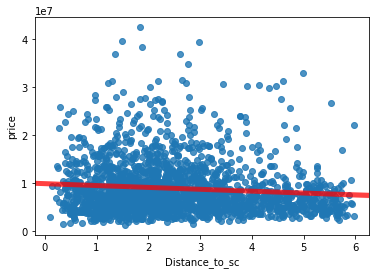

In [35]:
#scatter plot for Distance_to_sc , price
sns.regplot(x=df_real_state_final_2['Distance_to_sc'], 
            y=df_real_state_final_2["price"], line_kws={"color":"r","alpha":0.7,"lw":5})

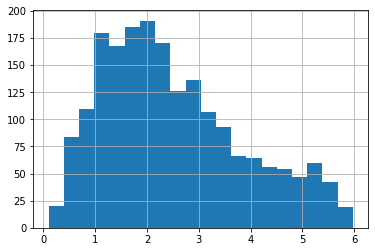

In [36]:
#histogram for Distance_to_sc

df_real_state_final_2['Distance_to_sc'].hist(bins=20)

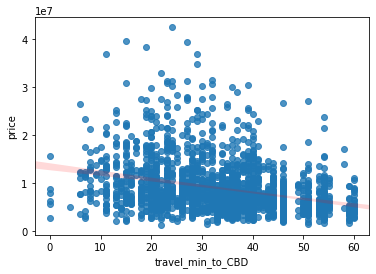

In [37]:
#scatter plot for travel_min_to_CBD , price

sns.regplot(x=df_real_state_final_2['travel_min_to_CBD'], 
            y=df_real_state_final_2["price"], line_kws={"color":"r","alpha":0.7,"lw":5})

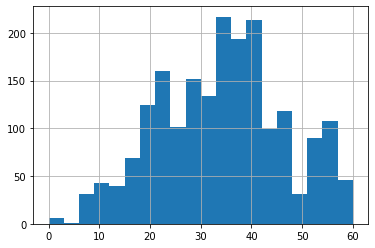

In [38]:
#histogram for travel_min_to_CBD
df_real_state_final_2['travel_min_to_CBD'].hist(bins=20)

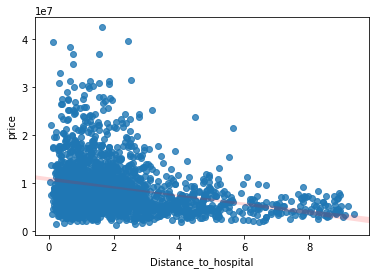

In [39]:
#scatter plot for Distance_to_hospital , price


sns.regplot(x=df_real_state_final_2['Distance_to_hospital'], 
            y=df_real_state_final_2["price"], line_kws={"color":"r","alpha":0.7,"lw":5})

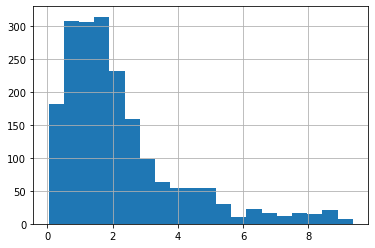

In [40]:
#histogram for Distance_to_hospital 

df_real_state_final_2['Distance_to_hospital'].hist(bins=20)

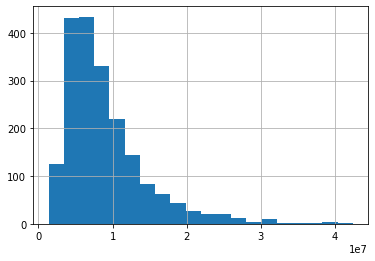

In [41]:
#histogram plot for price

df_real_state_final_2['price'].hist(bins=20)

From the scatter plots above, we can determine the linearity between the predictors and the target class. We can see that the points are not spread across the regression line and are unevenly spread across the graph. Hence the data points are not well correlated with each other. From the graph above we can also determine the nature of correlation. If the regression line has a positive slope then we can say that the relationship between the predictor and target is positve hence they are directly related to each other. However if the slope is negative then we can say that the relationship between the predictor and target is negative hence they are inversely reated to each other. 

From the histograms above we can see that the data for the columns Distance_to_sc, Distance_to_hospital and price the data is right skewed. Hence there is skewness in the data and the values in the repesctive columns wi be more enclined towards certain values. This will cause issues while creating Linear models as the model may predict incorrect values of prices because of this skewness in data. Hence we need to correct the skeness as well for these columns using transformation techniques. 

 <div class="alert alert-block alert-success">
    
   ### 2.2.1 DATA TRANSFORMATION
   </div>


Now for the columns which exhibited right skewness I have applied transformations using math.pow()

Using this I have experimented with values of power to attain the correct results. The different values of power taken in pow() are based on the left and right skewness of the data. If the data is right skewed, we can apply power tranformations with values less than 1. This would help in building better data values and hence the normality and linearity issues will be removed after such transformations. If the data is data is left skewed, we can apply power transformations with vaues near to or greater than 1. This would help in building better data values and hence the normality and linearity issues will be removed after such transformations. 

Hence for the columns Distance_to_sc , Distance_to_hospital, price I have applied power transformations with values of power less than 1 and for the column travel_min_to_CBD I have applied power transformation with vaue of power as 1.3.

For column Distance_to_sc I have used a power of 0.2 so sqrt basically

For column travel_min_to_CBD I have used a power of 1.3

For column Distance_to_hospital I have used a power of 1/3

For column price I have used a power of 0.2


In [42]:
import math
#making new coloumns
df_real_state_final_2['Distance_to_sc_power'] = None
df_real_state_final_2['travel_min_to_CBD_power'] = None
df_real_state_final_2['Distance_to_hospital_power'] = None
df_real_state_final_2['price_power'] = None

#transforming the columns
i = 0
for row in df_real_state_final_2.iterrows():
    df_real_state_final_2['Distance_to_sc_power'].at[i] = math.sqrt(df_real_state_final_2["Distance_to_sc"][i])
    df_real_state_final_2['travel_min_to_CBD_power'].at[i] = math.pow(df_real_state_final_2["travel_min_to_CBD"][i],1.3)
    df_real_state_final_2['Distance_to_hospital_power'].at[i] = math.pow(df_real_state_final_2["Distance_to_hospital"][i],1/3)
    df_real_state_final_2['price_power'].at[i] = math.pow(df_real_state_final_2["price"][i],0.2)

    i += 1
#changing the datatypes of the columns    
df_real_state_final_2['Distance_to_sc_power'] = df_real_state_final_2['Distance_to_sc_power'].astype(float)
df_real_state_final_2['travel_min_to_CBD_power'] = df_real_state_final_2['travel_min_to_CBD_power'].astype(float)
df_real_state_final_2['Distance_to_hospital_power'] = df_real_state_final_2['Distance_to_hospital_power'].astype(float)
df_real_state_final_2['price_power'] = df_real_state_final_2['price_power'].astype(float)
df_real_state_final_2.head()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,Distance_to_sc_power,travel_min_to_CBD_power,Distance_to_hospital_power,price_power
0,3.124,40,2.757,7920000,1.767484,120.970086,1.402207,23.974250
1,1.274,46,4.989,4970000,1.128716,145.072529,1.708721,21.840938
2,2.370,37,2.991,2920000,1.539480,109.310591,1.440806,19.637065
3,1.700,40,1.731,10245000,1.303840,120.970086,1.200694,25.240758
4,0.527,26,2.030,9792000,0.725948,69.097980,1.266189,25.013489


Now plotting again the scatter plots and histograms for the new transformed columns we get the folowing graphs

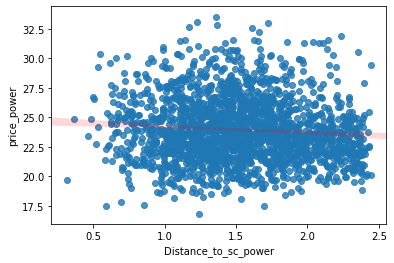

In [43]:
sns.regplot(x=df_real_state_final_2['Distance_to_sc_power'], 
            y=df_real_state_final_2["price_power"], line_kws={"color":"r","alpha":0.7,"lw":5})

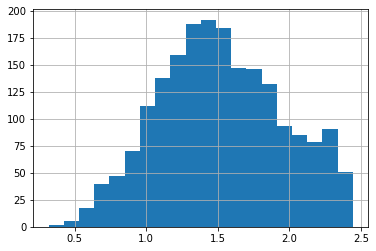

In [44]:
df_real_state_final_2['Distance_to_sc_power'].hist(bins=20)

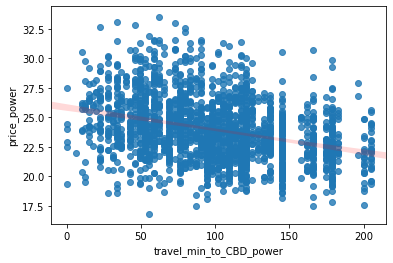

In [45]:
sns.regplot(x=df_real_state_final_2['travel_min_to_CBD_power'], 
            y=df_real_state_final_2["price_power"], line_kws={"color":"r","alpha":0.7,"lw":5})

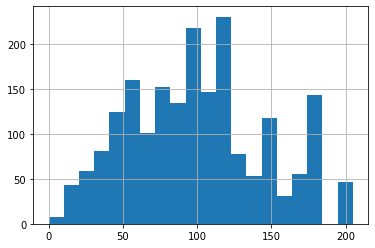

In [46]:
df_real_state_final_2['travel_min_to_CBD_power'].hist(bins=20)

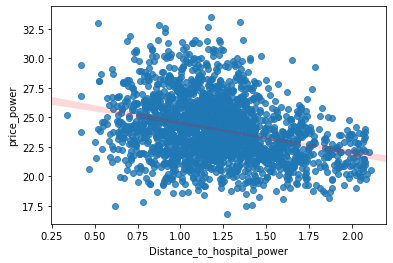

In [47]:
sns.regplot(x=df_real_state_final_2['Distance_to_hospital_power'], 
            y=df_real_state_final_2["price_power"], line_kws={"color":"r","alpha":0.7,"lw":5})

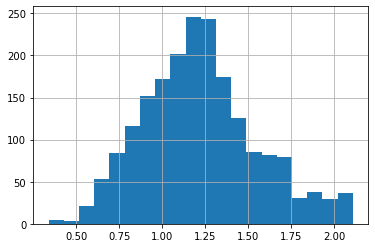

In [48]:
df_real_state_final_2['Distance_to_hospital_power'].hist(bins=20)

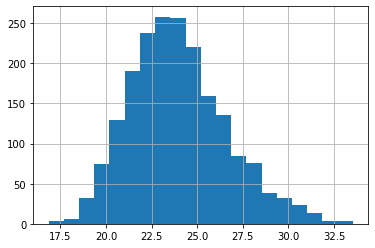

In [49]:
df_real_state_final_2['price_power'].hist(bins=20)

The scatter plots above now have the data points more evenly distributed and hence the points are well spread across the regression line. Hence the linearity issue has now been corrected after applying the transformations. The regression line hence is more surrounded by the data points. From the graphs above we can aso see that there exist a negative correlation between the columns and the predictor values. Hence is one increases the other will decrease and if one decreases the other's value will increase. Hence the correlation is depicted from the scatter plots. We can aso use the .corr() of a dataframe to see the correlation exact values between the columns and predictors. Hence after using the transformation techniques, we can say that the linearity assumption for creating the Linear model is satisfied and better column values will be used for creating the model.

Looking at the histograms above we can see that after applying the tranformation techniques, the histogram are now showing better normality as the data have been normally distributed now. Hence the right and left skewness that was seen before for the columns, have been removed after applying the transformations. The histograms hence give a bell shaped structure which signifies that the data is normally distributed and hence the Linear model will not be more inclined towards predicting particular values of price. 

 <div class="alert alert-block alert-success">
    
   ### 2.2.2 DATA NORMALIZATION
   </div>


For the data normalisation, we will use the StandardScaler() approach. This approach is used when the data has been normally distributed and hence the scaling becomes easier to do. The data points will be scaled in a better manner. After applying this approach we will get the mean as 0 and the standard deviation as 1 for the column. This approach also handles outiers as opposed to the MinMax scaling approach. Hence the Zscore scaling is done which firsts takes the columns and applies the fit and transform functions on them. Then the scaled df created wi contain the final values after scaling and hence these would then be used while creating the model. As a result the model will treat all its columns/predictors equally as they are now scaled and hence the readability of the model will increase without effecting the performance of the model. Hence the coefficient values of the model will change accordingly for each predictor. 

To appy the ZScore Standard Scaling we will follow the below steps - 

In [50]:
#fitting the given columns into standard scaler()
scale = preprocessing.StandardScaler().fit(df_real_state_final_2[['Distance_to_sc_power','travel_min_to_CBD_power',
                                                                  'Distance_to_hospital_power','price_power']])
df_scaled = scale.transform(df_real_state_final_2[['Distance_to_sc_power','travel_min_to_CBD_power',
                                                   'Distance_to_hospital_power','price_power']]) # an array not a df

In [51]:
#making columns with scaled values
df_real_state_final_2['Distance_to_sc(scaled)'] = df_scaled[:,0]
df_real_state_final_2['travel_min_to_CBD(scaled)'] = df_scaled[:,1]
df_real_state_final_2['Distance_to_hospital(scaled)'] = df_scaled[:,2]
df_real_state_final_2['price(scaled)'] = df_scaled[:,3]


In [52]:
df_real_state_final_2

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,Distance_to_sc_power,travel_min_to_CBD_power,Distance_to_hospital_power,price_power,Distance_to_sc(scaled),travel_min_to_CBD(scaled),Distance_to_hospital(scaled),price(scaled)
0,3.124,40,2.757,7920000,1.767484,120.970086,1.402207,23.974250,0.562385,0.468377,0.549150,0.004118
1,1.274,46,4.989,4970000,1.128716,145.072529,1.708721,21.840938,-0.911761,0.995924,1.481193,-0.794912
2,2.370,37,2.991,2920000,1.539480,109.310591,1.440806,19.637065,0.036199,0.213178,0.666520,-1.620370
3,1.700,40,1.731,10245000,1.303840,120.970086,1.200694,25.240758,-0.507610,0.468377,-0.063609,0.478487
4,0.527,26,2.030,9792000,0.725948,69.097980,1.266189,25.013489,-1.841269,-0.666984,0.135549,0.393363
...,...,...,...,...,...,...,...,...,...,...,...,...
1973,1.029,23,1.555,13140000,1.014396,58.917755,1.158538,26.528890,-1.175588,-0.889806,-0.191798,0.960955
1974,4.685,33,3.200,5211000,2.164486,94.203735,1.473613,22.048762,1.478585,-0.117477,0.766279,-0.717072
1975,4.379,53,0.218,13580000,2.092606,174.404879,0.601846,26.704223,1.312701,1.637942,-1.884578,1.026626
1976,1.125,43,0.993,5400000,1.060660,132.895107,0.997661,22.206430,-1.068821,0.729389,-0.680989,-0.658017


In [53]:
#describing the dataframe
df_real_state_final_2.describe()

,Distance_to_sc,travel_min_to_CBD,Distance_to_hospital,price,Distance_to_sc_power,travel_min_to_CBD_power,Distance_to_hospital_power,price_power,Distance_to_sc(scaled),travel_min_to_CBD(scaled),Distance_to_hospital(scaled),price(scaled)
count,1978.000000,1978.000000,1978.000000,1.978000e+03,1978.000000,1978.000000,1978.000000,1978.000000,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03
mean,2.509711,33.724469,2.233648,8.958297e+06,1.523795,99.570978,1.221613,23.963257,-1.627167e-16,2.943733e-16,4.175965e-16,7.153305e-16
std,1.352683,12.396559,1.824723,5.513052e+06,0.433423,45.699305,0.328945,2.670554,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00
min,0.100000,0.000000,0.039000,1.360000e+06,0.316228,0.000000,0.339121,16.854186,-2.786819e+00,-2.179380e+00,-2.683469e+00,-2.662694e+00
25%,1.457000,24.000000,0.983250,5.213250e+06,1.207063,62.269390,0.994385,22.050665,-7.309536e-01,-8.164461e-01,-6.909502e-01,-7.163591e-01
50%,2.237000,34.000000,1.733500,7.509500e+06,1.495660,97.931542,1.201272,23.720410,-6.492846e-02,-3.588350e-02,-6.185281e-02,-9.095815e-02
75%,3.348250,41.000000,2.785000,1.089925e+07,1.829822,124.916272,1.406938,25.555202,7.062494e-01,5.547503e-01,5.635363e-01,5.962613e-01
max,5.974000,60.000000,9.370000,4.240000e+07,2.444177,204.925794,2.108207,33.533059,2.124054e+00,2.305975e+00,2.695944e+00,3.584358e+00



 <div class="alert alert-block alert-success">
    
   ### 2.2.3 Compare the variables before and after normalization with plots

   </div>


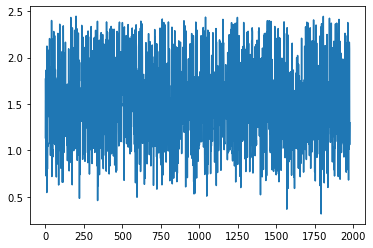

In [54]:
df_real_state_final_2["Distance_to_sc_power"].plot()

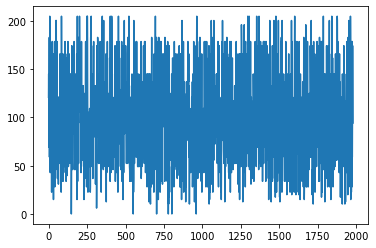

In [55]:
df_real_state_final_2["travel_min_to_CBD_power"].plot()

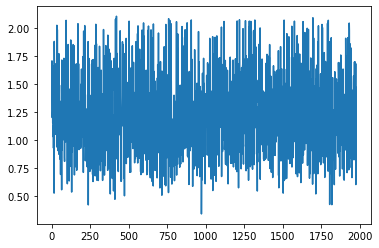

In [56]:
df_real_state_final_2["Distance_to_hospital_power"].plot()

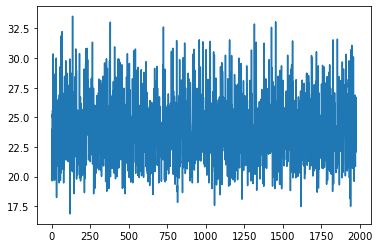

In [57]:
df_real_state_final_2["price_power"].plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x15fbbe7dcf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15fbbe7dcf8>)

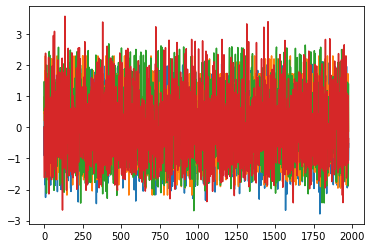

In [58]:
df_real_state_final_2["Distance_to_sc(scaled)"].plot(),df_real_state_final_2["travel_min_to_CBD(scaled)"].plot(),
df_real_state_final_2["Distance_to_hospital(scaled)"].plot(),df_real_state_final_2["price(scaled)"].plot()

Hence if were trying to plot the graphs for the not scaled data, we could not plot it in one graph because the scales on y axis are very different and varying from each other. As a result the plotting could not even be seen visely in a single graph. 

Then we plotted the scaled values on a single graph and we could plot them together. Hence because of scaling the graph has been depicted together. Also after this approach we can see that the shape or distribution of the data never changes, we only change the scale of the data. Hence after StandardScaling approach, we have been abe to scale the data well which would be used in model creation. 

The final columns are the scaled columns i.e Distance_to_sc(scaled),travel_min_to_CBD(scaled),Distance_to_hospital(scaled),price(scaled)


 <div class="alert alert-block alert-success">
    
  ### 3 Summary

TASK 1 - 

In this we task we have 7 different files wih different formats i.e json,pdf,xml,html,shape files etc into dataframe. With the help of this dataframes we have found out the nearest train station id, nearest shopping center, nearest supermarket, nearest hosipitals with their minimum distance from the property given. With teh haversine formula the distance is being calculated and the nearest ids is also being filled with the haverson formula.

Minimum distance to CBD is also calculated with some filters according to the given specifiaction and calculating the flag value 1 if there is no direct transfer and 0 if there is a direct transfer.


TASK 2 - 

In the task 2 we have to reshape the data with different techiques which involves normalization/scaling and transformation techiques on the dataframe which contains only the three columns i.e Distance_to_sc,travel_min_to_CBD,Distance_to_hospital and price. The reason we have to perform some techiques on this dataframe havinbg the specific column because we assume that this data will be used to make a linear model to predict the price with the help of the the coloumn of the dataframe.